In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d
import random

In [2]:

bank_dataset = pd.read_csv('bank.csv',
                          na_values = "?", comment = '\t',
                         sep = ";", skipinitialspace = True)
wine_dataset = pd.read_csv('winequality-red.csv', 
                          na_values = "?", comment = '\t',
                         sep = ";", skipinitialspace = True)


In [3]:
bank_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
target_bank = bank_dataset.pop("y")
target_bank.shape

(4521,)

In [5]:

clas = []
for i in (target_bank):
    
    if i == "yes":
        clas.append(1)
    elif i == "no":
        clas.append(0)
target_bank = clas
target_bank = np.asarray(target_bank)
target_bank = pd.DataFrame(data=target_bank.flatten())
target_bank = target_bank.values.reshape(4521, 1)
target_bank.shape

(4521, 1)

In [6]:
bank_dataset = pd.get_dummies(bank_dataset, prefix=["job", "marital", "education", "default", "housing",
                                                    "loan", "contact", "month","poutcome"])

In [7]:
bank_dataset.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [8]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
target_wine = wine_dataset.pop("quality")
target_wine = target_wine.values.reshape(target_wine.shape[0], 1)

In [10]:
wine_dataset.shape

(1599, 11)

In [11]:
from sklearn.model_selection import train_test_split
def split(Xdata,Ydata):
    x_train, x_test, y_train, y_test = train_test_split(Xdata,Ydata, test_size=0.2,random_state=0)
    return x_train,y_train,x_test,y_test

x_train1,y_train1,x_test1,y_test1 = split(wine_dataset,target_wine)
x_train2,y_train2,x_test2,y_test2 = split(bank_dataset, target_bank)

In [13]:

def norm(data, norm_data):
    train_stats = data.describe()
    train_stats = train_stats.transpose()
    return(norm_data - train_stats['mean'])/ train_stats['std']

In [14]:
x_train1 = norm(wine_dataset, x_train1)
x_test1 = norm(wine_dataset, x_test1)
x_train2 = norm(bank_dataset, x_train2)
x_test2 = norm(bank_dataset, x_test2)

In [15]:
x_train2.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
4383,-1.434360,-0.270351,1.465228,-0.584789,-0.576766,-0.407173,-0.320377,2.907970,-0.514351,-0.196432,...,-0.364765,-0.104664,-0.66899,-0.306794,-0.134201,-0.107857,-0.348613,-0.213423,-0.171362,0.469249
502,-0.961601,-0.468381,1.465228,-0.592486,0.709488,-0.407173,-0.320377,-0.343806,-0.514351,-0.196432,...,-0.364765,-0.104664,-0.66899,-0.306794,-0.134201,-0.107857,-0.348613,-0.213423,-0.171362,0.469249
4052,1.023987,-0.466055,1.465228,-0.353892,-0.576766,-0.407173,-0.320377,-0.343806,-0.514351,-0.196432,...,-0.364765,-0.104664,-0.66899,-0.306794,-0.134201,-0.107857,-0.348613,-0.213423,-0.171362,0.469249
3634,1.213091,-0.421864,1.222736,-0.731023,-0.576766,-0.407173,-0.320377,-0.343806,-0.514351,-0.196432,...,-0.364765,-0.104664,1.49446,-0.306794,-0.134201,-0.107857,-0.348613,-0.213423,-0.171362,0.469249
3088,-0.961601,0.372584,-0.110975,-0.046030,-0.576766,1.440589,1.451037,-0.343806,-0.514351,-0.196432,...,-0.364765,-0.104664,-0.66899,-0.306794,-0.134201,-0.107857,-0.348613,-0.213423,5.834294,-2.130595


In [16]:
def gradient(x_train, y_train, beta):
    pred = np.dot(x_train, beta)
    loss = pred - y_train
    gra = np.dot(np.transpose(x_train), loss)
    
    return gra

In [17]:
def RMSE(x_train,y_train, beta):
    pred = np.dot(x_train, beta)
    err = y_train - pred
    RMSE = np.sqrt(np.mean(err**2))
    return RMSE


In [18]:
def penalty(beta, lamda1):
    cont = []
    for i in beta:
        if i > 0 :
            cont.append(np.negative(2 * lamda1*i))
        elif i <= 0:
            cont.append(2*lamda1*i)
    cont = np.asarray(cont)
    cont = cont.reshape(len(cont),1)
    return cont
            

In [19]:
def Rigde_regressionBGD(x_train,y_train, beta, x_test, y_test, epochs, lnr,lamda,batch_size):
    batches = int(x_train.shape[0] / batch_size)
    beta1 = beta
    beta2 = beta
    beta3 = beta
    RMSE_train1st = []
    RMSE_test1st = []
    RMSE_train2nd = []
    RMSE_test2nd = []
    RMSE_train3rd = []
    RMSE_test3rd = []
    counter = [0,1,2]
    itr = []
    for j in range(epochs):
        itr.append(j)
           
        for r,lam, k in zip(lnr,lamda, counter):
            
            for i in range(batches):
                x = x_train[i*batch_size: (i+1)*batch_size]
                y = y_train[i*batch_size: (i+1)*batch_size]
                              
                
                if k == 0:
                    beta1 = beta1 - r * (gradient(x_train, y_train, beta1) + penalty(beta1,lam) )
                elif k == 1:
                    beta2 = beta2 - r * (gradient(x_train, y_train, beta2) + penalty(beta2,lam) )
                elif k == 2:
                    beta3 = beta3 - r * (gradient(x_train, y_train, beta3) + penalty(beta3,lam) )
                    
            if k == 0:
                RMSE_train1st.append(RMSE(x_train,y_train, beta1))
                RMSE_test1st.append(RMSE(x_test,y_test, beta1))  
            elif k == 1:
                RMSE_train2nd.append(RMSE(x_train,y_train, beta2))
                RMSE_test2nd.append(RMSE(x_test,y_test, beta2))
            elif k == 2:
                RMSE_train3rd.append(RMSE(x_train,y_train, beta3))
                RMSE_test3rd.append(RMSE(x_test,y_test, beta3))
    
    return RMSE_train1st, RMSE_test1st, RMSE_train2nd, RMSE_test2nd, RMSE_train3rd, RMSE_test3rd, itr
    

In [70]:
learn_rate = [0.000000005, 0.000002, 0.00001]
lamda = [0.00001, 0.005, 1 ]
epoch = 10
batch_size = 50
foo = []
for p in range(51):
    foo.append(0)
beta2 = np.asarray(foo)
beta2 = beta2.reshape(51,1)
foo = []
for p in range(11):
    foo.append(0)
beta1 = np.asarray(foo)
beta1 = beta1.reshape(11,1)

In [71]:

RMSE_train1st,RMSE_test1st,RMSE_train2nd,RMSE_test2nd,RMSE_train3rd,RMSE_test3rd,itr, = Rigde_regressionBGD(x_train1,y_train1, 
                                                                                                           beta1, x_test1, y_test1, epoch, learn_rate,lamda,batch_size)

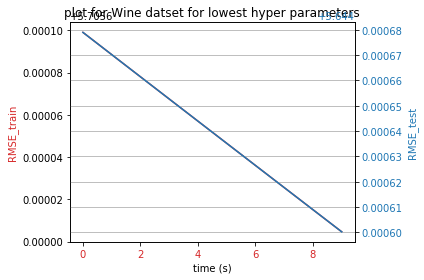

In [72]:
fig, ax1 = plt.subplots()
plt.title("plot for Wine datset for lowest hyper parameters")
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('RMSE_train', color=color)
ax1.plot(itr, RMSE_train1st, color=color, label = "train")
ax1.tick_params(axis='x', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('RMSE_test', color=color)  # we already handled the x-label with ax1
ax2.plot(itr, RMSE_test1st, color=color,label = "test ")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
plt.show()

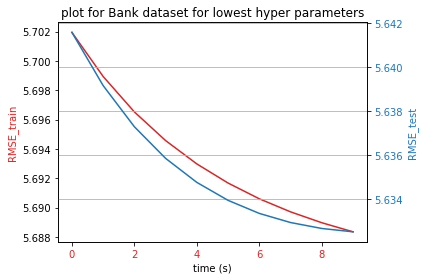

In [73]:
fig, ax1 = plt.subplots()
plt.title("plot for Bank dataset for lowest hyper parameters")
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('RMSE_train', color=color)
ax1.plot(itr, RMSE_train2nd, color=color, label = "train")
ax1.tick_params(axis='x', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('RMSE_test', color=color)  # we already handled the x-label with ax1
ax2.plot(itr, RMSE_test2nd, color=color,label = "test ")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
plt.show()

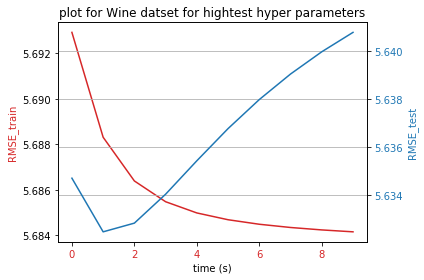

In [74]:
fig, ax1 = plt.subplots()
plt.title("plot for Wine datset for hightest hyper parameters")
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('RMSE_train', color=color)
ax1.plot(itr, RMSE_train3rd, color=color, label = "train")
ax1.tick_params(axis='x', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('RMSE_test', color=color)  # we already handled the x-label with ax1
ax2.plot(itr, RMSE_test3rd, color=color,label = "test ")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
plt.show()

In [75]:
def k_fold(data,k,itr,way):
    m = data.shape[0]
    div = int(m/k)
    test = data[itr* div: (itr+1)* div]
    if way == 1:
        train = np.delete(data, slice(itr* div, (itr+1)* div), axis = 0)
    elif way == 2:
        train = data.drop(data.index[itr* div: (itr+1)* div])
    
    return train,test

    
    

In [76]:
def cross_valid(x_train1,y_train1, beta,lnr,lamda,batch_size):
    beta = beta
    RMSE_total = []
    lda = []
    lng = []
    itr = []         
    for r,lam in zip(lnr,lamda):
            
        for fold in range(5):
            rmse = []
            x_train, x_test = k_fold(x_train1,5,fold,2)
            y_train, y_test = k_fold(y_train1,5,fold,1)
            batches = int(x_train.shape[0] / batch_size)
            for i in range(batches):
                x = x_train[i*batch_size: (i+1)*batch_size]
                y = y_train[i*batch_size: (i+1)*batch_size]
                              
                beta = beta - r * (gradient(x_train, y_train, beta) + penalty(beta,lam) )
            rmse.append(RMSE(x_test,y_test, beta))
        lda.append(lam)
        lng.append(r)
        RMSE_total.append(np.mean(np.around(rmse, decimals=6)))
        
            
    
    return RMSE_total,lda,lng,beta
    

In [353]:

learn_rate2 = []
for i in range(20):
    learn_rate2.append(random.uniform(0.0000005,0.00000002))
lamda2 = []
for i in range(20):
    lamda2.append(random.uniform(0.00001,0.000001))
batch_size = 50
foo = []
for p in range(51):
    foo.append(0)
beta2 = np.asarray(foo)
beta2 = beta2.reshape(51,1)
foo = []
for p in range(11):
    foo.append(0)
beta1 = np.asarray(foo)
beta1 = beta1.reshape(11,1)

In [361]:
RMSE1,Landa,l_rate,beta = cross_valid(x_train2,y_train2, beta2,learn_rate2,lamda2,batch_size)

Text(0.5, 0.92, 'plot for bank_dataset ')

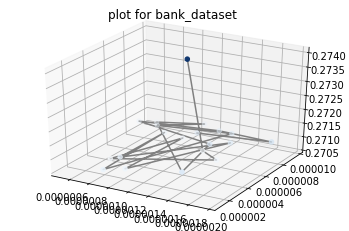

In [362]:
fig = plt.figure()

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = RMSE1
xline = l_rate
yline = Landa
ax.plot3D(xline, yline, zline, 'gray')
ax.scatter3D(xline, yline, zline, c=zline, cmap='Blues')
plt.title("plot for bank_dataset ")

In [363]:
parameters = {'learning_rate': l_rate , 'lambda': Landa, "RMSE": RMSE1}
parameters1 = pd.DataFrame(data=parameters)
parameters1


,learning_rate,lambda,RMSE
0,1.211445e-06,0.000006,0.273943
1,1.343355e-06,0.000007,0.270697
2,1.588336e-06,0.000006,0.270763
3,7.145904e-07,0.000003,0.270659
4,1.040354e-06,0.000008,0.270762
5,1.020933e-06,0.000002,0.270817
6,1.577165e-06,0.000007,0.271049
7,8.631990e-07,0.000003,0.270910
8,8.602896e-07,0.000008,0.270872
9,8.831167e-07,0.000001,0.270865


In [322]:
parameters = {'learning_rate': l_rate , 'lambda': Landa, "RMSE": RMSE1}
parameters1 = pd.DataFrame(data=parameters)
parameters1

,learning_rate,lambda,RMSE
0,2.749868e-06,0.000094,5.695685
1,2.415541e-06,0.000022,5.691490
2,6.843891e-07,0.000085,5.690630
3,2.168513e-06,0.000054,5.688531
4,4.376690e-06,0.000012,5.685698
5,3.366343e-06,0.000093,5.683823
6,2.725635e-06,0.000078,5.682434
7,1.258341e-06,0.000038,5.681789
8,2.323139e-06,0.000031,5.680766
9,4.528577e-06,0.000024,5.679255


Text(0.5, 0.92, 'plot for wine dataset ')

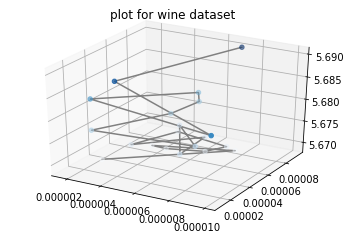

In [305]:
fig = plt.figure()

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = RMSE1
xline = l_rate
yline = Landa
ax.plot3D(xline, yline, zline, 'gray')
ax.scatter3D(xline, yline, zline, c=zline, cmap='Blues')
plt.title("plot for wine dataset ")

In [364]:
def Rigde_regressionBGD2(x_train,y_train, beta, x_test, y_test, epochs, lnr,lamda,batch_size):
    batches = int(x_train.shape[0] / batch_size)
    beta = beta
    
    RMSE_train = []
    RMSE_test = []
   
    
    itr = []
    for j in range(epochs):
        itr.append(j)
           
        
            
        for i in range(batches):
            x = x_train[i*batch_size: (i+1)*batch_size]
            y = y_train[i*batch_size: (i+1)*batch_size]
                              
                
                
            beta = beta - lnr * (gradient(x_train, y_train, beta) + penalty(beta,lamda) )
               
                    
          
        RMSE_train.append(RMSE(x_train,y_train, beta))
        RMSE_test.append(RMSE(x_test,y_test, beta))  
         
    
    return RMSE_train,RMSE_test,itr,beta

In [371]:
d = np.where(parameters["RMSE"] == np.amin(parameters["RMSE"]))
for x in d:
    d1 =x 
d1[0]
learn_rate3 = l_rate[d1[0]]

lamda3 = Landa[d1[0]]

batch_size = 50
epoch = 10
foo = []
for p in range(51):
    foo.append(0)
beta2 = np.asarray(foo)
beta2 = beta2.reshape(51,1)
foo = []
for p in range(11):
    foo.append(0)
beta1 = np.asarray(foo)
beta1 = beta1.reshape(11,1)
print(learn_rate3,lamda3)

7.145904371976067e-07 3.3845510349478042e-06


In [372]:
RMSE_train,RMSE_test,itr,beta =Rigde_regressionBGD2(x_train1,y_train1,beta1, x_test1,
                                                    y_test1, epoch, learn_rate3,lamda3,batch_size)

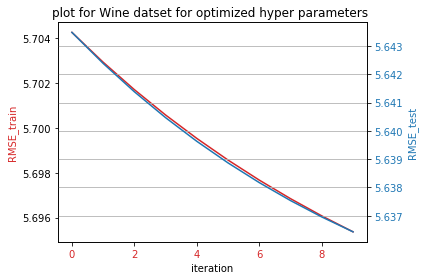

In [373]:
fig, ax1 = plt.subplots()
plt.title("plot for Wine datset for optimized hyper parameters ")
color = 'tab:red'
ax1.set_xlabel('iteration')
ax1.set_ylabel('RMSE_train', color=color)
ax1.plot(itr, RMSE_train, color=color, label = "train")
ax1.tick_params(axis='x', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('RMSE_test', color=color)  # we already handled the x-label with ax1
ax2.plot(itr, RMSE_test, color=color,label = "test ")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
plt.show()

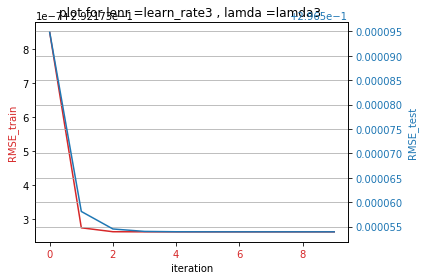

In [185]:
fig, ax1 = plt.subplots()
plt.title("plot for Wine datset for lowest hyper parameters ")
color = 'tab:red'
ax1.set_xlabel('iteration')
ax1.set_ylabel('RMSE_train', color=color)
ax1.plot(itr, RMSE_train, color=color, label = "train")
ax1.tick_params(axis='x', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('RMSE_test', color=color)  # we already handled the x-label with ax1
ax2.plot(itr, RMSE_test, color=color,label = "test ")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
plt.show()